In [ ]:
# https://youtu.be/wtrKToZNgAg

# For installation instructions of the pyclesperanto package, 
please refer to the following link
# https://github.com/clEsperanto/pyclesperanto_prototype

python version is:  3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]


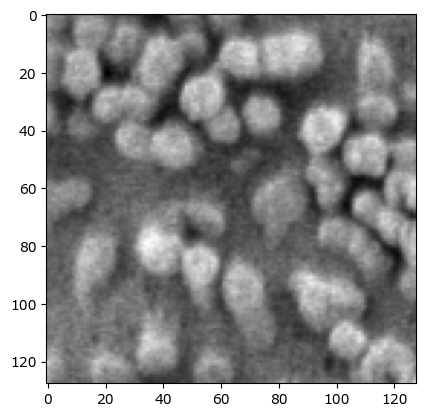

In [6]:
import sys
import cv2
print("python version is: ", sys.version)

from matplotlib import pyplot as plt
import pyclesperanto_prototype as cle
from skimage import io

img = io.imread("C:/Users/lucyh/Desktop/Images/Cells/Images/Mock 2 T0-0002-5k_#path610.tiff")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

number of detected maxima locations 43.0


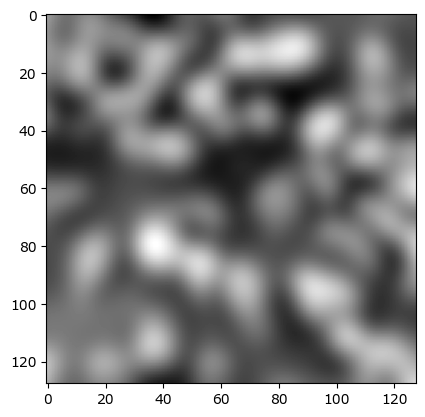

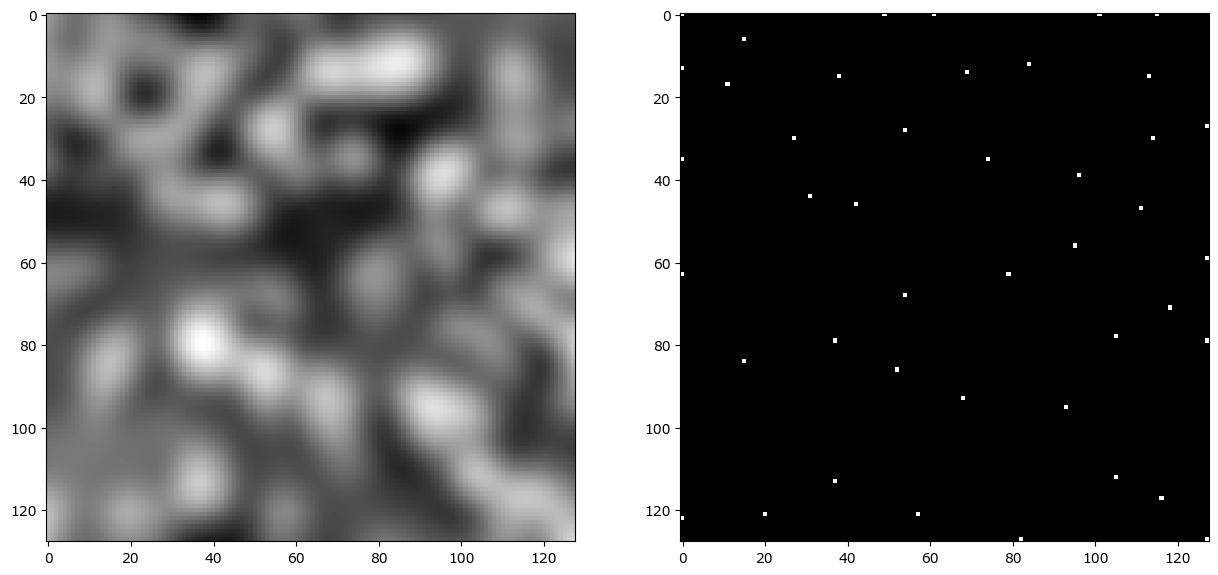

In [19]:
# Step 1: heavy gaussian blur the image (e.g., sigma=12) and detect maxima for each nuclei
# heavy gaussian blurring assists in detecting maxima that reflects the objects.
#If objects are closer, you may want to decrease the amount of blurring.
img_gaussian = cle.gaussian_blur(img, sigma_x=4, sigma_y=4, sigma_z=4)
plt.imshow(img_gaussian, cmap='gray')

# Find out the maxima locations for each 'blob'
img_maxima_locations = cle.detect_maxima_box(img_gaussian, radius_x=0, radius_y=0, radius_z=0)

#Number of maxima locations (= number of objects)
#This number depend on the amount of Gaussian blur
number_of_maxima_locations = cle.sum_of_all_pixels(img_maxima_locations)
print("number of detected maxima locations", number_of_maxima_locations)

#View the blurred image and corresponding maxima locations
fig, axs = plt.subplots(1, 2, figsize=(15, 15))
cle.imshow(img_gaussian, plot=axs[0], color_map='gray')
cle.imshow(img_maxima_locations, plot=axs[1], color_map='gray')


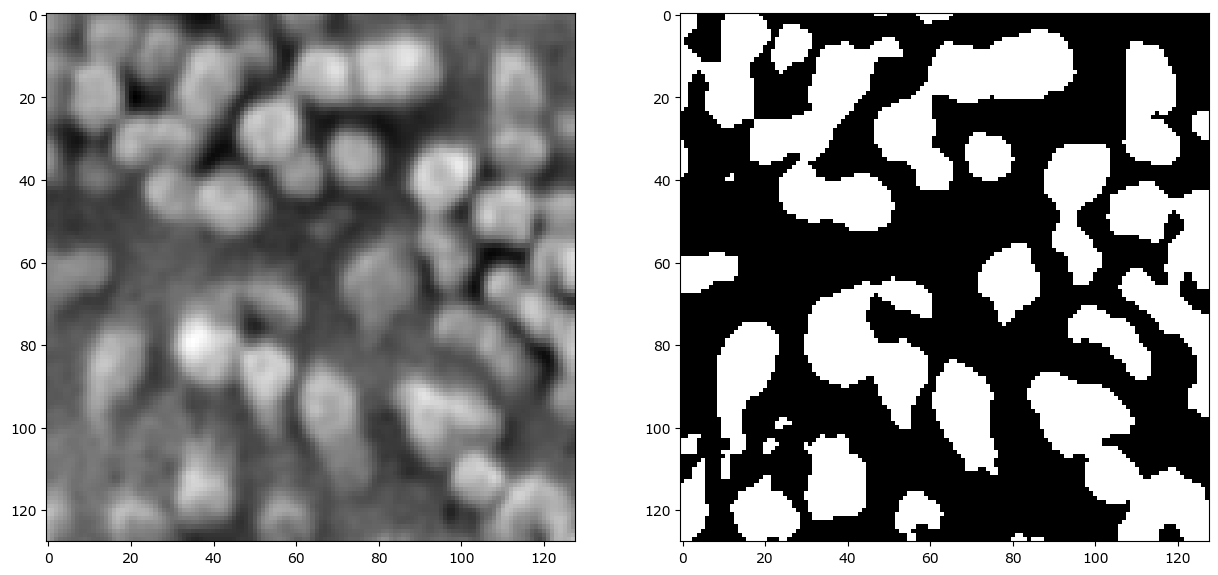

In [20]:
#Step 2: threshold the input image after applying light gaussian blur (sigma=1)
img_gaussian2 = cle.gaussian_blur(img, sigma_x=1, sigma_y=1, sigma_z=1)
img_thresh = cle.threshold_otsu(img_gaussian2)

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
cle.imshow(img_gaussian2, plot=axs[0], color_map='gray')
cle.imshow(img_thresh, plot=axs[1], color_map='gray')

number of relevant maxima locations 41.0


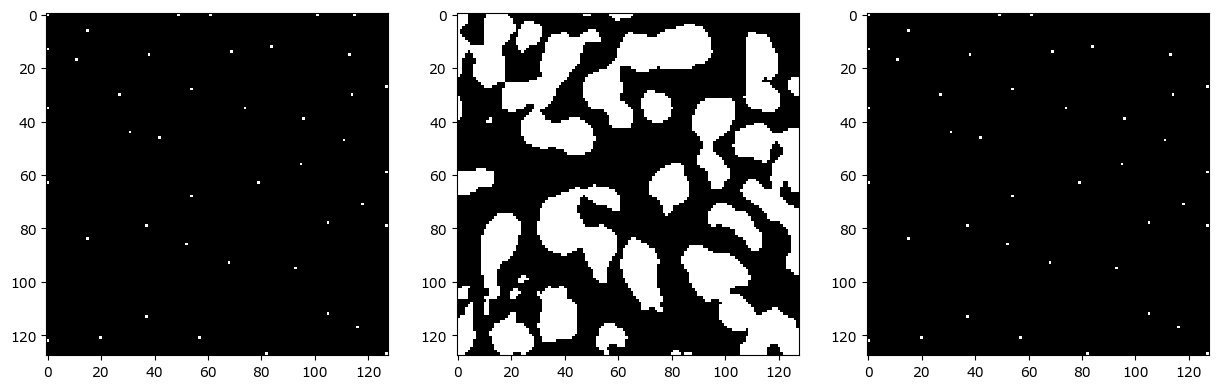

In [21]:
#Step 3: Exclude maxima locations from the background, to make sure we only include the ones from nuclei
# We can do this by using binary and operation
img_relevant_maxima = cle.binary_and(img_thresh, img_maxima_locations)

number_of_relevant_maxima_locations = cle.sum_of_all_pixels(img_relevant_maxima)
print("number of relevant maxima locations", number_of_relevant_maxima_locations)


fig, axs = plt.subplots(1, 3, figsize=(15, 15))
cle.imshow(img_maxima_locations, plot=axs[0], color_map='gray')
cle.imshow(img_thresh, plot=axs[1], color_map='gray')
cle.imshow(img_relevant_maxima, plot=axs[2], color_map='gray')

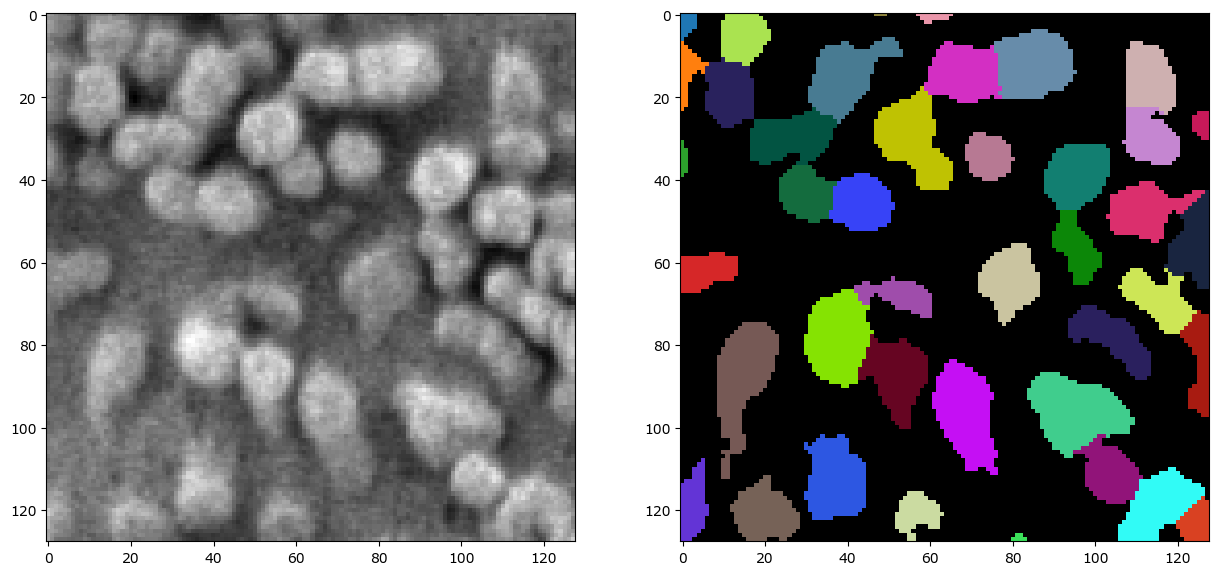

In [22]:
#Step 4: Separate maxima locations into labels using masked voronoi
voronoi_separation = cle.masked_voronoi_labeling(img_relevant_maxima, img_thresh)

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
cle.imshow(img, plot=axs[0], color_map='gray')
cle.imshow(voronoi_separation, labels=True, plot=axs[1])